In [1]:
import numpy as np
import sklearn 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import importlib 
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
from DecisionTreeClassifier import DecisionTreeClassifier

In [174]:
importlib.reload(DecisionTreeClassifier)

<module 'DecisionTreeClassifier.DecisionTreeClassifier' from '/home/robin/uu/dm/data_mining/DecisionTreeClassifier/DecisionTreeClassifier.py'>

## Test on credit:

(10, 6)
 Node:  3 40.0
  Node:  0 45.0
   Leaf:  0
   Node:  1 1.0
    Leaf:  0
    Leaf:  1
  Leaf:  1


array([[5, 0],
       [0, 5]])

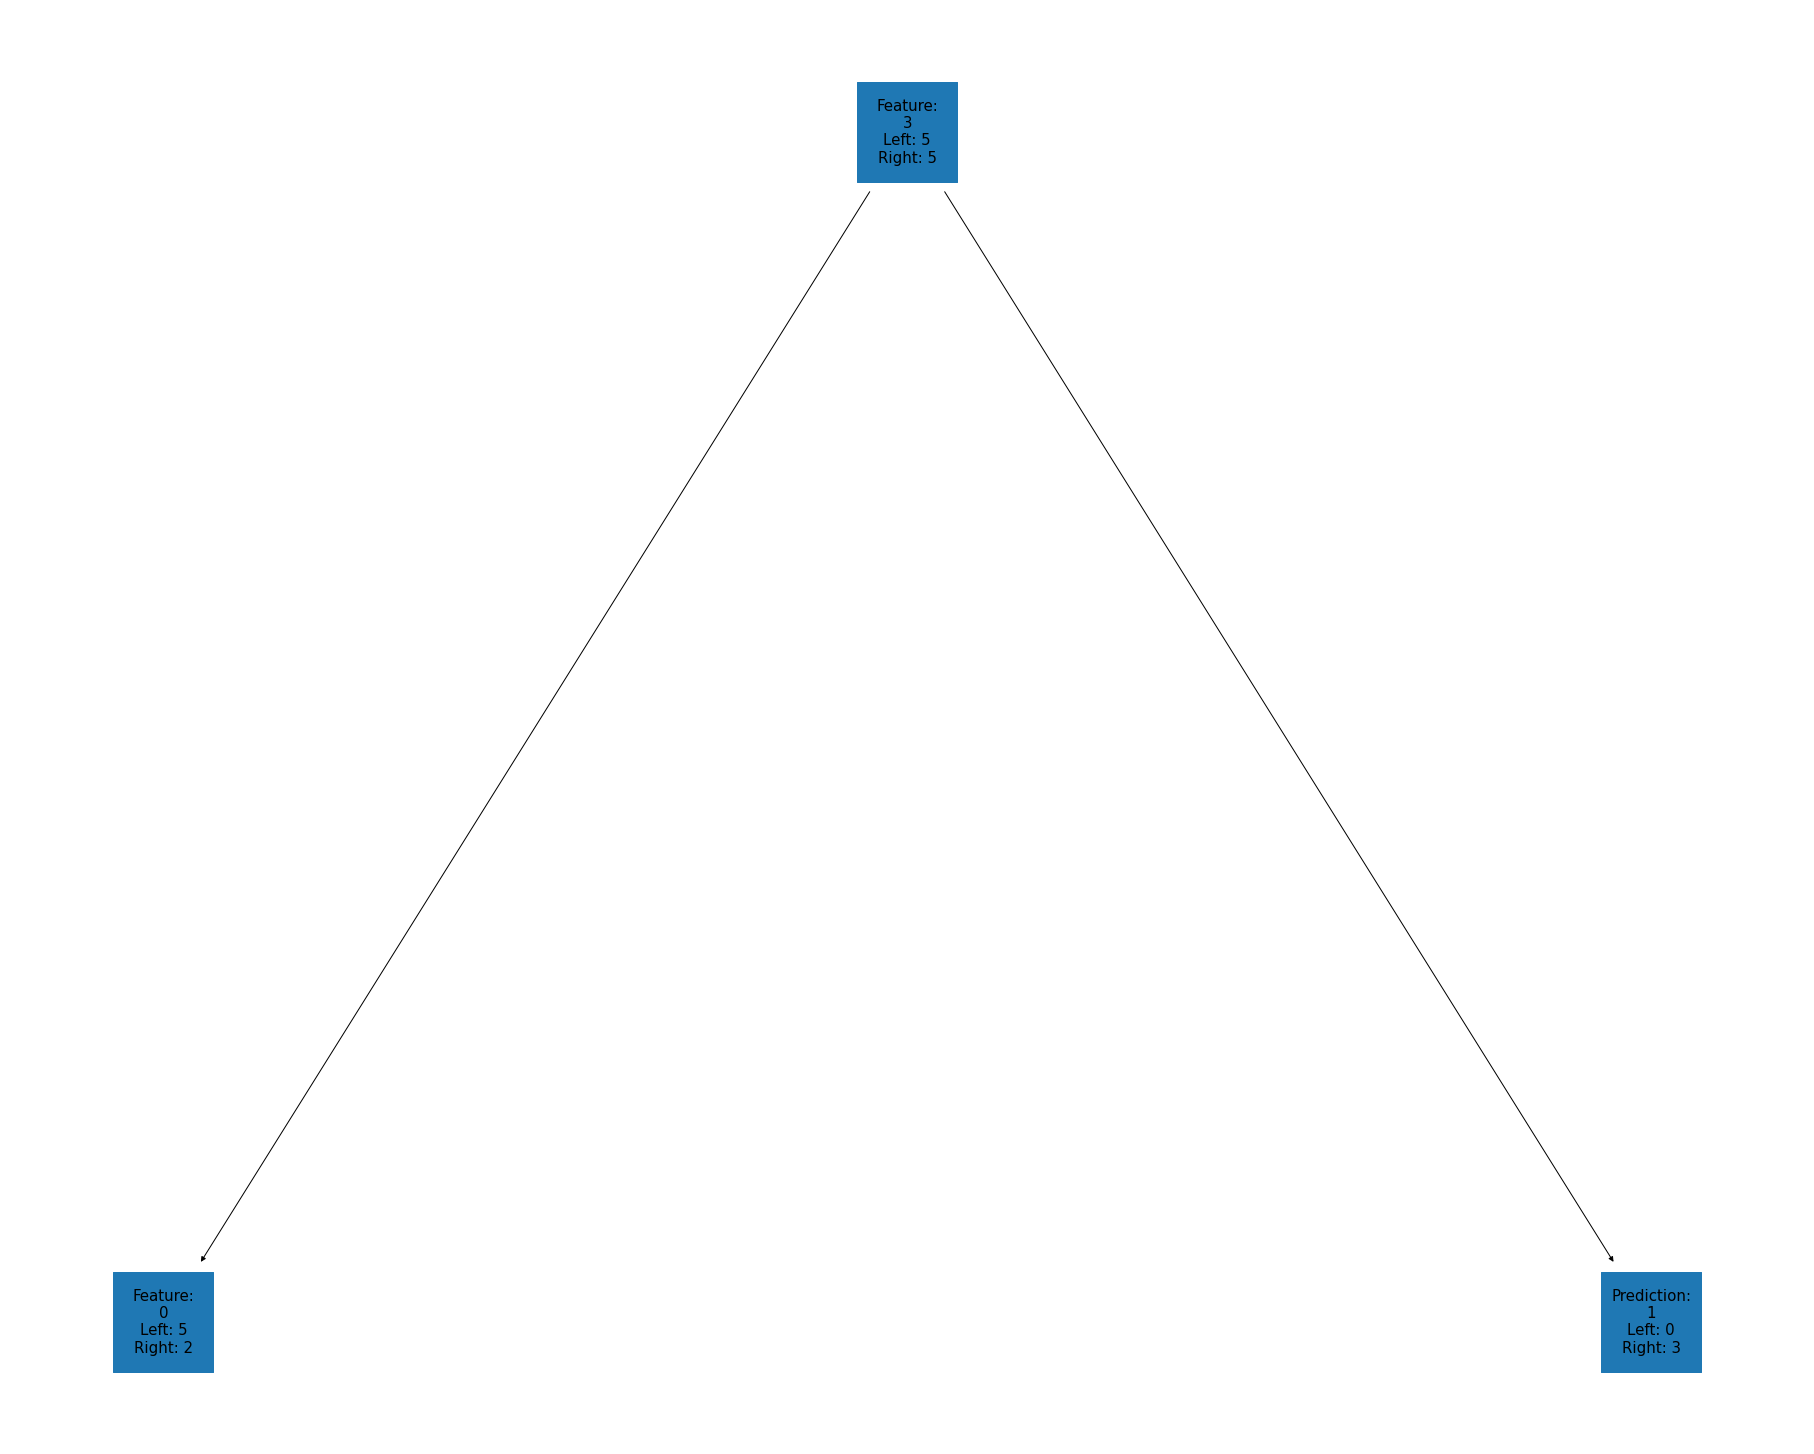

In [2]:
dt = DecisionTreeClassifier.DecisionTree()
credit = np.loadtxt('res/credit.txt', delimiter=',', skiprows=1)
print(credit.shape)

dt_credit = DecisionTreeClassifier.DecisionTree()
dt_credit.tree_grow(credit[:, :-1], credit[:, -1], nmin=1, minleaf=1, nfeat=None)
dt_credit.print_tree()
fig = plt.figure(figsize=(25,20))
dt_credit.plot_tree(max_depth=1)

y_pred = dt_credit.tree_predict(credit[:, :-1])
y_true = credit[:,-1]
confusion_matrix(y_true, y_pred)

# PIMA Indians Dataset

In [179]:
pima = np.loadtxt('res/pima.txt', delimiter=',', skiprows=1)

dt_pima = DecisionTreeClassifier.DecisionTree()
np.random.shuffle(pima)
dt_pima.tree_grow(pima[:, :-1], pima[:, -1], nmin=20, minleaf=5, nfeat=None)
#dt_pima.print_tree()
#dt_pima.plot_tree()

y_pred = dt_pima.tree_predict(pima[:, :-1])
y_true = pima[:,-1]

confusion_matrix(y_true, y_pred)

array([[441,  59],
       [ 51, 216]])

## Promise data:

In [3]:
microsoft_metrics = {
"FOUT": "Number of method calls (fan out)" ,
"MLOC": "Method lines of code",
"NBD" : "Nested block depth",
"PAR":  "Number of parameters",
"VG": "McCabe cyclomatic complexity",
"NOF": "Number of fields",
"NOM": "Number of methods",
"NSF": "Number of static fields",
"NSM": "Number of static methods",
"ACD": "Number of anonymous type declarations", 
"NOI": "Number of interfaces ",
"NOT": "Number of classes ",
"TLOC": "Total lines of code",
"NOCU": "Number of files",
} 

In [4]:
bug_predict_train = pd.read_csv('res/eclipse-metrics-packages-2.0.csv', delimiter=';')
bug_predict_test = pd.read_csv('res/eclipse-metrics-packages-3.0.csv', delimiter=';')

bug_predict_train.head()
#np.loadtxt('res/eclipse-metrics-packages-2.0.csv', delimiter=';', skiprows=1)

,plugin,packagename,pre,post,ACD_avg,ACD_max,ACD_sum,FOUT_avg,FOUT_max,FOUT_sum,...,NORM_ParameterizedType,NORM_QualifiedType,NORM_WildcardType,NORM_NormalAnnotation,NORM_MarkerAnnotation,NORM_SingleMemberAnnotation,NORM_MemberValuePair,NORM_AnnotationTypeDeclaration,NORM_AnnotationTypeMemberDeclaration,NORM_Modifier
0,org.eclipse.jdt.junit,org.eclipse.jdt.internal.junit.launcher,5,0,0.571429,4.0,4.0,5.980769,29.0,311.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017372
1,org.eclipse.jdt.junit,org.eclipse.jdt.internal.junit.runner,2,0,0.000000,0.0,0.0,4.000000,22.0,168.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051474
2,org.eclipse.jdt.junit,org.eclipse.jdt.internal.junit.ui,9,0,1.238095,14.0,26.0,4.321267,33.0,955.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034461
3,org.eclipse.jdt.junit,org.eclipse.jdt.internal.junit.util,2,0,0.555556,4.0,5.0,3.752941,80.0,319.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028606
4,org.eclipse.jdt.junit,org.eclipse.jdt.internal.junit.wizards,6,0,2.000000,5.0,18.0,6.552632,63.0,996.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024341


In [5]:
microsoft_metrics.keys()
predictive_variables = []
for feature in bug_predict_train.columns:
    for microsoft_metric in microsoft_metrics.keys():
        if microsoft_metric in feature:
            predictive_variables.append(feature)
predictive_variables.append("pre")

x_train = bug_predict_train[predictive_variables].to_numpy()
print(x_train.shape)
y_train = np.where(bug_predict_train["post"].to_numpy() > 0,1, 0)
print(y_train.shape)
x_test = bug_predict_test[predictive_variables].to_numpy() l
print(x_test.shape)
y_test = np.where(bug_predict_test["post"].to_numpy() > 0,1, 0)
print(y_test.shape)

(377, 41)
(377,)
(661, 41)
(661,)


In [6]:
dt_bagging = DecisionTreeClassifier.RandomForest()
dt_bagging.tree_grow_b(x_train, y_train, nmin=15, minleaf=5, nfeat=41, m = 100)
dt_random_forest = DecisionTreeClassifier.RandomForest()
dt_random_forest.tree_grow_b(x_train, y_train, nmin=15, minleaf=5, nfeat=6, m = 100)


In [7]:
dt_normal = DecisionTreeClassifier.DecisionTree()
dt_normal.tree_grow(x_train, y_train, nmin=15, minleaf=5, nfeat=41)


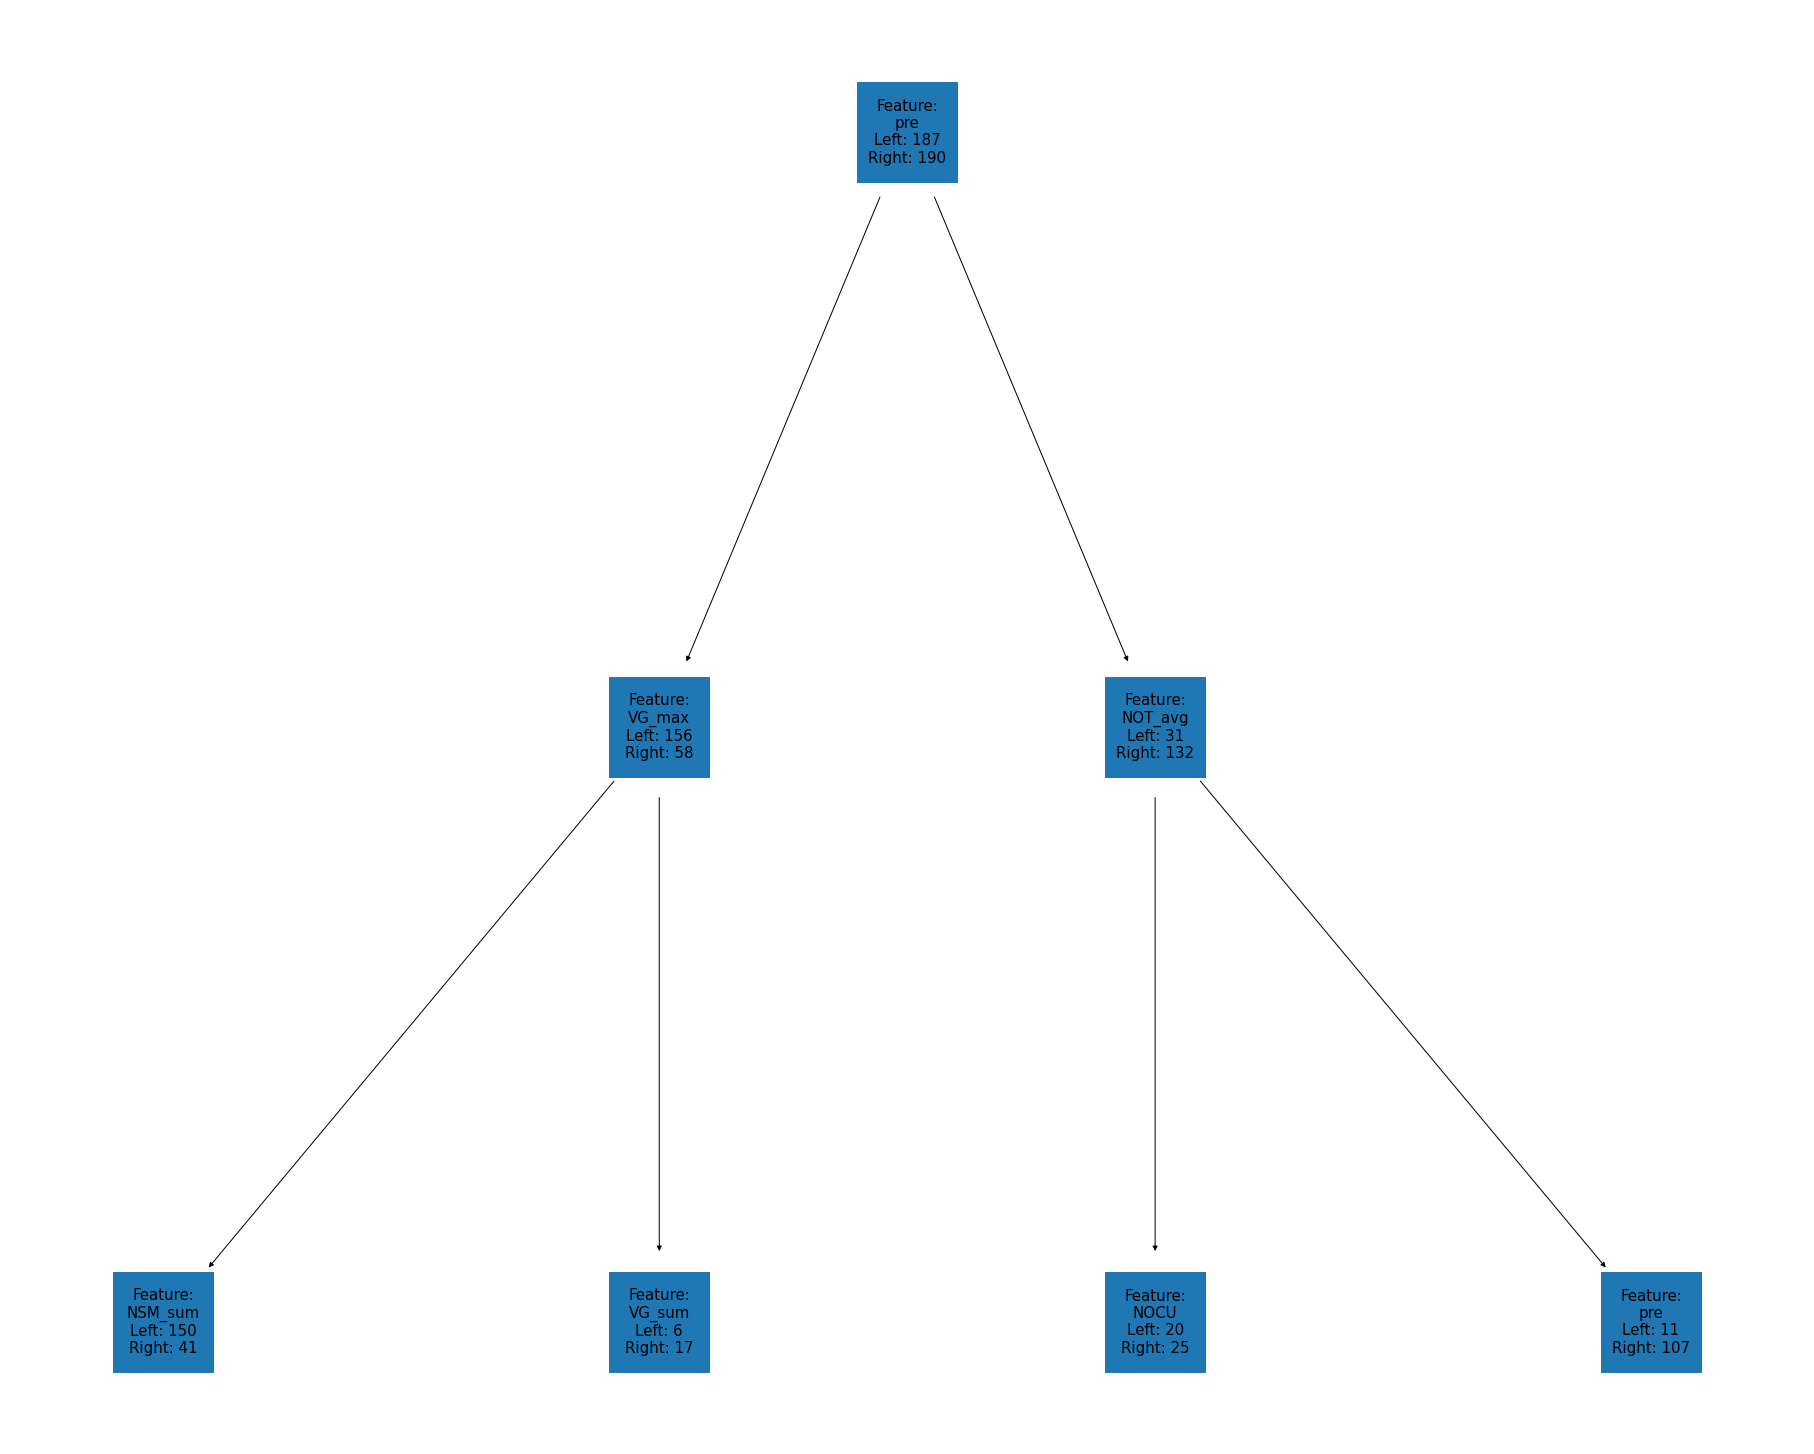

In [185]:
fig = plt.figure(figsize=(25,20))
dt_normal.plot_tree(max_depth=2, feature_names={i:feature for i, feature in enumerate(predictive_variables)})


In [8]:
y_pred = dt_normal.tree_predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

y_pred = dt_bagging.tree_pred_b(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

y_pred = dt_random_forest.tree_pred_b(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

[[256  92]
 [ 92 221]]
Accuracy:  0.7216338880484114
Precision:  0.7060702875399361
Recall:  0.7060702875399361
[[295  53]
 [ 99 214]]
Accuracy:  0.7700453857791225
Precision:  0.8014981273408239
Recall:  0.6837060702875399
[[276  72]
 [ 91 222]]
Accuracy:  0.7534039334341907
Precision:  0.7551020408163265
Recall:  0.7092651757188498
